# Assignment 1 , Fall 2021
# Heart Disease Prediction using Machine Learning Algorithms

### By Yunchao Yang


For this assignment, I am going to study the prediction of cardiovascular disease. Facing high risk of heart disease is a shadow in my life since I was diagnosed with brugada syndrome, I am especially interested in studying the pattern of heart disease.

Heart disease (cardiovascular disease) occurs when blood flow to the heart muscle is suddenly blocked. According to statistics from the World Health Organization, 17.9 million people die from heart attacks every year. Medical research shows that the human lifestyle is the main cause of this heart problem. In addition, there are many key factors that warn that the person may/may not have a heart attack.

The data set contains medical information about some patients, which indicates whether the person has a low or high chance of having a heart attack. Use this information to explore the data set and use different machine learning models to classify the target variable and find an algorithm that fits the data set.

The growth of medical data collection provides new opportunities for doctors to improve patient diagnosis.  In recent years, practitioners have increased their use of computer technology to improve decision support. In the healthcare industry, machine learning is becoming an important solution for assisting patient diagnosis. Machine learning is an analysis tool used when tasks are large and difficult to program, such as converting medical records into knowledge, epidemic prediction, and genomic data analysis


## Goal:
The goal of this study is to predict whether a patient should be diagnosed with Heart Disease. This is a binary outcome.
•	Positive (+) = 1, patient diagnosed with Heart Disease
•	Negative (-) = 0, patient not diagnosed with Heart Disease

Experiment with various Classification Models & see which yields greatest accuracy.

## Datasets
The dataset is from the UCI database, which collects from 4 different clinical hospitals. The reason why choosing this dataset is because of its reliability, based on the credential of the four clinics. The original datasets contains 76 features. Researchers shrunk the feature space to 13 features, which will be used in the following discussion.

### Features
1.	age: age in years
2.	sex: sex (1 = male; 0 = female)
3.	cp: chest pain type
•	Value 1: typical angina
•	Value 2: atypical angina
•	Value 3: non-anginal pain
•	Value 4: asymptomatic
4.	restbp: resting blood pressure (in mm Hg on admission to the hospital)
5.	chol: serum cholestoral in mg/dl
6.	fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7.	restecg: resting electrocardiographic results
•	Value 0: normal
•	Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
•	Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8.	maxhr: maximum heart rate achieved
9.	exang: exercise induced angina (1 = yes; 0 = no)
10.	oldpeak = ST depression induced by exercise relative to rest
11.	slope: the slope of the peak exercise ST segment
•	Value 1: upsloping
•	Value 2: flat
•	Value 3: downsloping
12.	mv: number of major vessels (0-3) colored by flourosopy
13.	thal: thallium heart scan
•	Value 3: normal
•	Value 6: fixed defect
•	Value 7: reversable defect
14.	diagnosis: severerity of heart disease (angiographic disease status)
•	Value 0: Absent
•	Value 1: Level 1
•	Value 2: Level 2
•	Value 3: Level 3
•	Value 4: Level 4



## Implementation Approaches Used

The heart disease prediction is been carried out using Naive Bayes Classifier, Logistic Regression, Decision Tree, KNN, XGBoost, SVM and Random Forest classifier 


1) Import Packages

2) Exploratory Data Analysis

3) Data split

4) Machine Learning models evaluation

5) Ensembling

6) Conclusion


The dataset used in the research was the “Heart Disease Dataset” of the UCI Machine Learning Repository



## Libraries Used / Requirements 

numpy == 1.16.5

pandas == 1.0.3

matplotlib == 3.4.3

Seaborn == 0.11.2

Sklearn == 0.22 

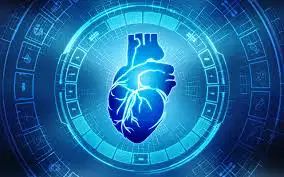

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

In [2]:
#EDA
import pandas_profiling as pp

# data preprocessing
from sklearn.preprocessing import StandardScaler

In [3]:
# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.svm import SVC

from sklearn.metrics import log_loss, auc, roc_auc_score

import sklearn



# using cross_validation to verify result
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std


In [4]:
print( "numpy version " + np.__version__)
print( "pandas version " + pd.__version__)
print( "matplotlib version " + matplotlib.__version__)
print( "seaborn version " + sns.__version__)
print( "sklearn version " + sklearn.__version__)

numpy version 1.16.5
pandas version 1.0.3
matplotlib version 3.4.3
seaborn version 0.11.2
sklearn version 0.22


# Exploratory Data Analysis (EDA)
## First, analysing the target variable:¶

In [5]:
data = pd.read_csv('Data/heart.csv')
data.head()

data.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Check if there are any null values in the dataset (False = no null, True = null present)
data = data.dropna()
data.isnull().to_numpy().any()
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Preview the first 5 rows of data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


From comparing positive and negative patients we can see there are vast differences 
in means for many of our 13 Features. From examining the details, we can observe that positive patients experience heightened maximum heart rate achieved (thalach) average. In addition, positive patients exhibit about 1/3rd the amount of ST depression induced by exercise relative to rest (oldpeak).

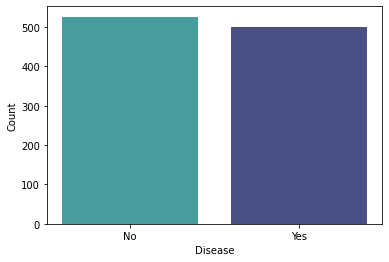

In [8]:
# Shows count of patients who do and don't have heart disease
fig = plt.figure()
plt.bar(data['target'].unique(), data['target'].value_counts(), color = ['#479D9E', '#495084'])
positions = (0,1)
plt.xticks(positions, ('No','Yes'))
plt.xlabel('Disease')
plt.ylabel('Count')
plt.show()
fig.savefig('disease_count.png')

## Analysing the sex feature

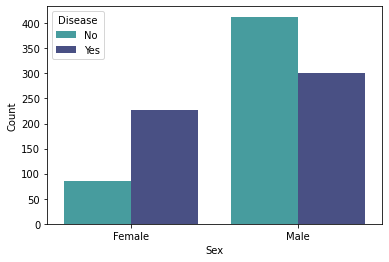

In [9]:
fig = plt.figure()

# Shows count of patients who do and don't have heart disease by sex
ax = sns.countplot(x='sex', hue='target', data=data, palette="mako_r")
# Format labels and legend
ax.set_xlabel('Sex')
ax.set_xticklabels(['Female','Male'])
plt.legend(title='Disease', loc='upper left', labels=['No', 'Yes'])
plt.ylabel('Count')
plt.show()
fig.savefig('disease_sex_count.png')

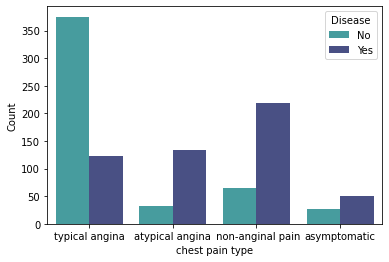

In [10]:
fig = plt.figure()

# Shows count of patients who do and don't have heart disease by sex
ax = sns.countplot(x='cp', hue='target', data=data, palette="mako_r")
# Format labels and legend
ax.set_xlabel('chest pain type')
ax.set_xticklabels(['typical angina','atypical angina', ' non-anginal pain', 'asymptomatic'])
plt.legend(title='Disease', loc='upper right', labels=['No', 'Yes'])
plt.ylabel('Count')
plt.show()

fig.savefig('disease_angina_count.png')


In [11]:

info = ["age",
        "1: male, 0: female",
        "chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
        "resting blood pressure",
        " serum cholestoral in mg/dl",
        "fasting blood sugar > 120 mg/dl",
        "resting electrocardiographic results (values 0,1,2)",
        " maximum heart rate achieved",
        "exercise induced angina",
        "oldpeak = ST depression induced by exercise relative to rest",
        "the slope of the peak exercise ST segment",
        "number of major vessels (0-3) colored by flourosopy",
        "thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]


for i in range(len(info)):
    print(data.columns[i]+": "+info[i])

age: age
sex: 1: male, 0: female
cp: chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps: resting blood pressure
chol:  serum cholestoral in mg/dl
fbs: fasting blood sugar > 120 mg/dl
restecg: resting electrocardiographic results (values 0,1,2)
thalach:  maximum heart rate achieved
exang: exercise induced angina
oldpeak: oldpeak = ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
ca: number of major vessels (0-3) colored by flourosopy
thal: thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


## Analysing the other features

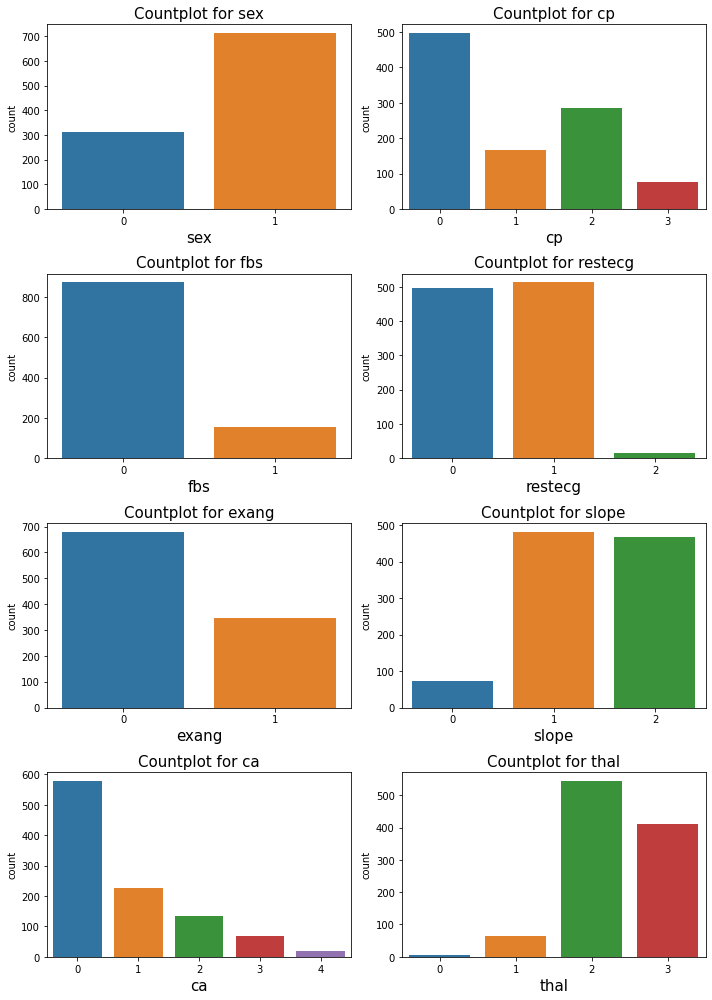

In [12]:
# Graphical representation of the distribution of numerical data
#data.hist(figsize=(20,10))
#plt.show()

dataCategory = data.copy();

# Change the datatype of some features from integer to cetegory
dataCategory[['sex', 'cp','fbs','restecg','exang','slope', 'ca', 'thal', 'target']]=dataCategory[['sex', 'cp','fbs','restecg','exang','slope', 'ca', 'thal', 'target']].astype('object')

# Countplot using Subplots
figure,ax=plt.subplots(4,2,figsize=(10,14))

df_cat=dataCategory.select_dtypes(include=np.object)

col=range(len(df_cat.columns))
m=0
while(m<(len(col)-1)):
    for i in range(4):
        for j in range(2):
            sns.countplot(x=df_cat.iloc[:,col[m]] ,  ax=ax[i,j])
            ax[i,j].set_title(f'Countplot for {df_cat.columns[m]}', fontsize=15)
            ax[i,j].set_xlabel(df_cat.columns[m],fontsize=15)
            
            m+=1

plt.tight_layout()
plt.show()
figure.savefig("features.png")

## Correlation matrix

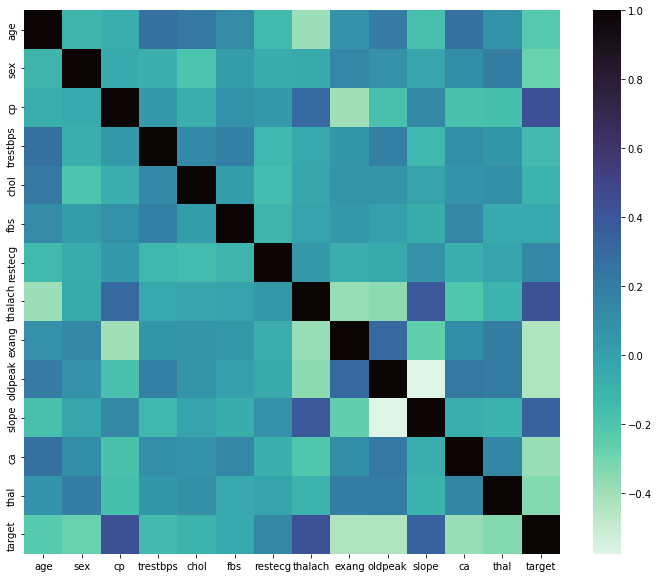

In [13]:

# Highly correlated variables are closer to +1 and less correlated variables are closer to -1.
fig, ax = plt.subplots(figsize=(12, 10))
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,cmap = 'mako_r')

plt.show()
fig.savefig("correlationMatrix.png")

We can see there is a positive correlation between chest pain (cp) & target (our predictor). 
This makes sense since, the greater amount of chest pain results in a greater chance of having heart disease. 
Cp (chest pain), is a ordinal feature with 4 values: Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic.

In addition, we see a negative correlation between exercise induced angina (exang) & our predictor. 
This makes sense because when you excercise, your heart requires more blood, but narrowed arteries slow down blood flow.
Pairplots are also a great way to immediately see the correlations between all variables. 
But you will see me make it with only continuous columns from our data, because with so many features, it can be difficult to see each one. 
So instead I will make a pairplot with only our continuous features.


## Correlation to Target

oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


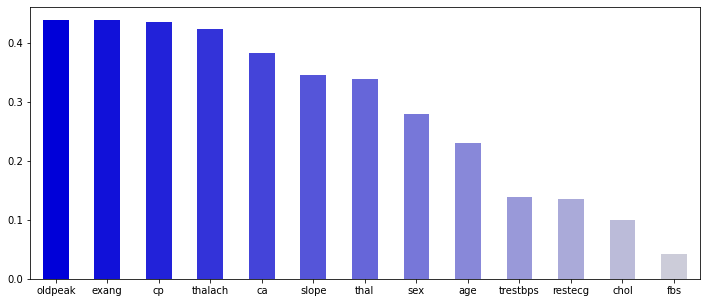

In [14]:
targetCorrelation = data.corr()["target"].abs().sort_values(ascending=False)
#type(targetCorrelation)

corr = targetCorrelation.drop(targetCorrelation.index[[0]])

print(corr)
from itertools import cycle, islice

my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(corr)))

fig = plt.figure(figsize=(12,5))

my_colors = [(x/15.0, x/15.0, 0.85) for x in range(len(data))]
#ax = corr.plot.bar(x='lab', y='val', rot=0, color={'blue'})
ax = corr.plot(kind = 'bar', x='lab', y='val', rot=0, color=my_colors)
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

plt.show()
fig.savefig("correlation_bar.png")

/Users/ruogu.fang/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

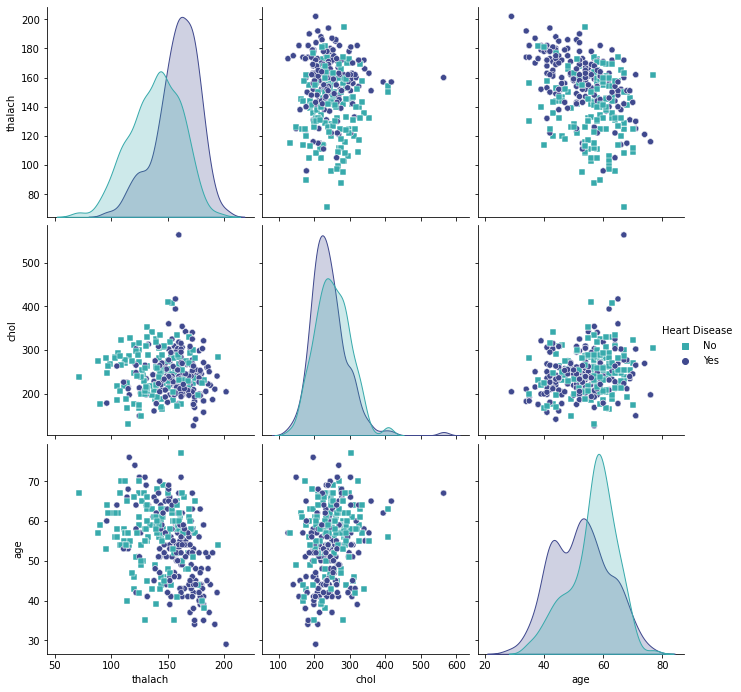

In [15]:
# Shows relationship between variables by target variable 
fig = plt.figure()

g = sns.pairplot(data, palette='mako_r', size=3.25, hue='target', 
                 markers=['s','o'], vars=['thalach','chol','age'])
# replace legend title
new_title = 'Heart Disease'
g._legend.set_title(new_title)
# replace legend labels
new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels): 
    t.set_text(l)
plt.show()

fig.savefig("relation_variables.png")

# Data preparation

To prepare data for modeling, assign, split, and normalize

.

In [16]:
# Assign the 13 features to X, & the last column to our classification predictor, y

y = data["target"]
X = data.drop('target',axis=1)


# Split: the data set into the Training set and Test set

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0) # split into train and test
X1, X_test, y1, y_test = train_test_split(X, y, test_size=0.2,train_size=0.8)
X_train, X_validation, y_train, y_validation = train_test_split(X1, y1,test_size = 0.25,train_size =0.75)

In [17]:
print("output = {0}".format(y_test.unique()))

print("X_train = {0}".format(X_train.shape))
print("y_train = {0}".format(y_train.shape))

print("X_validation = {0}".format(X_validation.shape))
print("y_validation = {0}".format(y_validation.shape))

print("X_test = {0}".format(X_test.shape))
print("y_test = {0}".format(y_test.shape))

output = [1 0]
X_train = (615, 13)
y_train = (615,)
X_validation = (205, 13)
y_validation = (205,)
X_test = (205, 13)
y_test = (205,)


In [18]:
# Standardize features by removing the mean and scaling to unit variance
# Normalize: Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1.
    
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Decision Tree Classifier


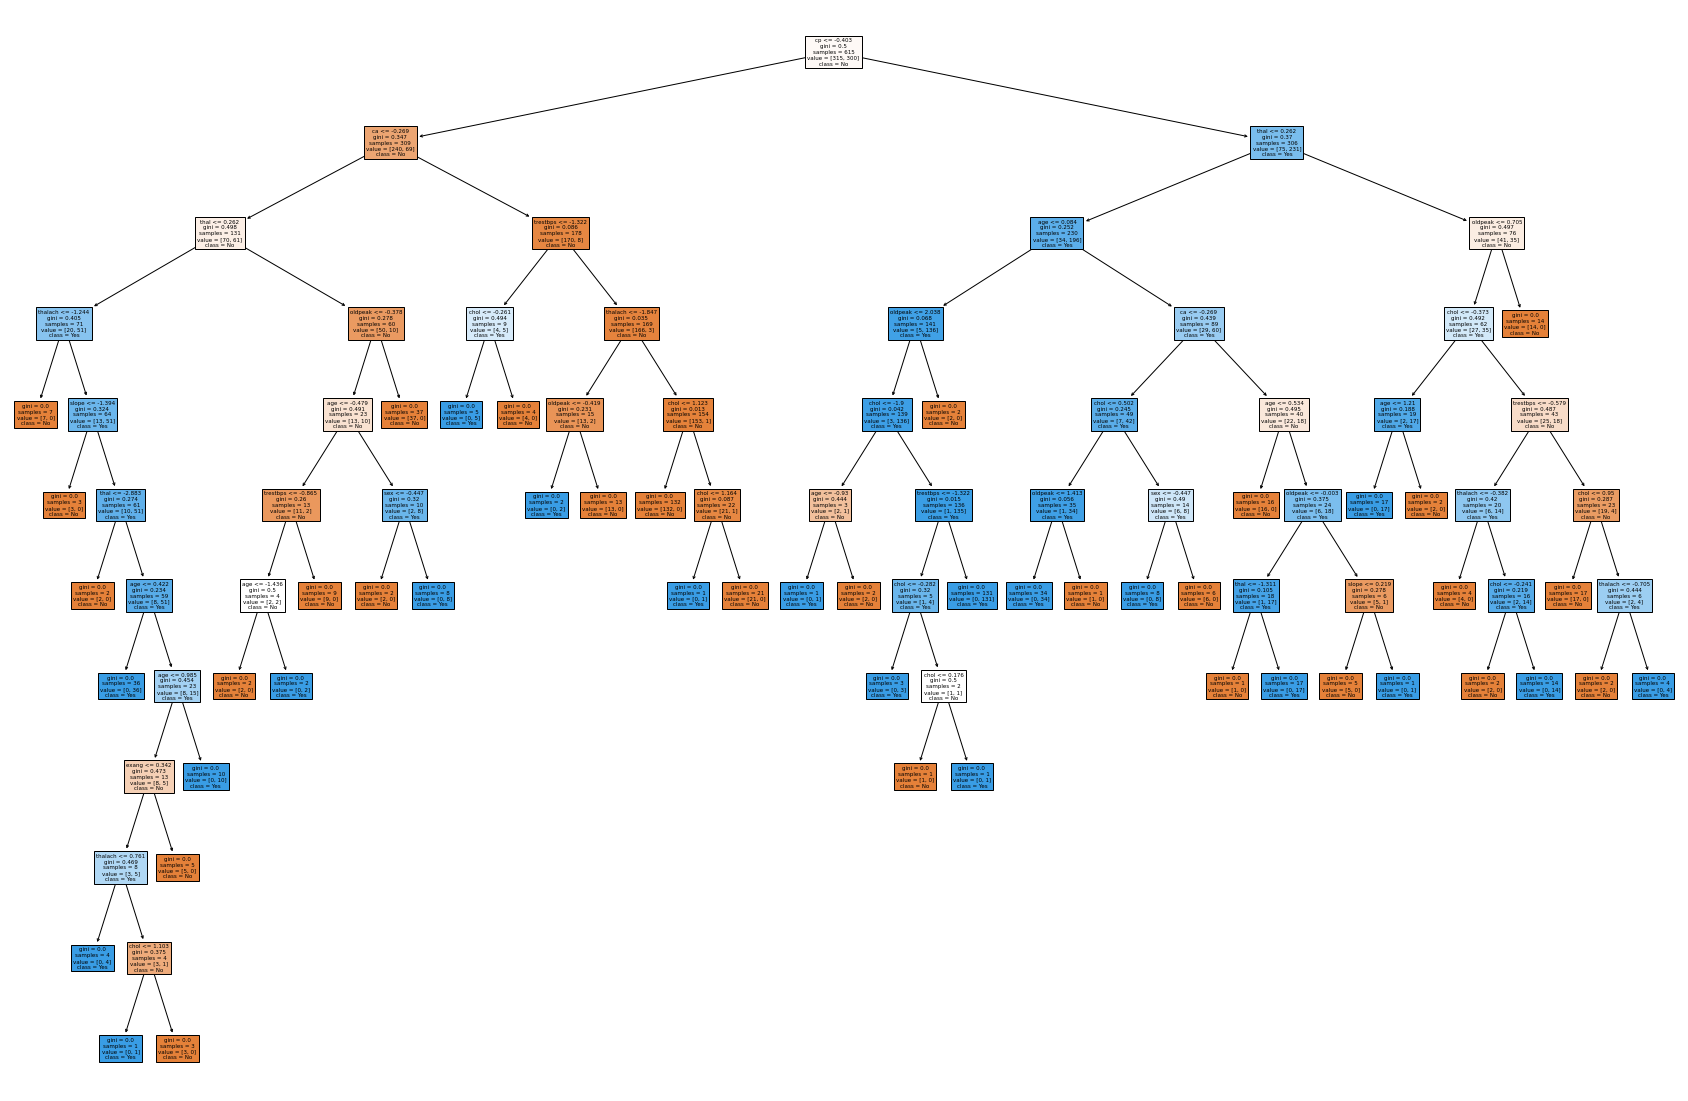

In [19]:
#The original decision tree

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

fig = plt.figure(figsize=(30,20))
features = data.columns
classes = ['No','Yes']
plot_tree(dt,feature_names=features,class_names=classes,filled=True)
plt.show()

fig.savefig("Decision_tree.pdf")

In [20]:
#decision tree with different depth

depth = 13; 

tree_auc_train, tree_auc_test = np.zeros(depth), np.zeros(depth) # store auc

for i in range(1,depth):
    
    print("\n =======================================================\nDepth = ", i)
    dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0, max_depth = i)

    # Train Decision Tree Classifer
    dt.fit(X_train, y_train)

    #Predict the response for test dataset
    dt_predicted = dt.predict(X_test)
    
    dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
    dt_acc_score = accuracy_score(y_test, dt_predicted)

    print("confussion matrix")
    print(dt_conf_matrix)
    print("\n")
    print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
    print(classification_report(y_test,dt_predicted))
    
    # performance
    scores = cross_val_score(dt, X, y, cv=5)
    print('CV Accuracy: mean = %.3f (std deviation = %.3f)' % (mean(scores), std(scores))) 
    
    tree_auc_train[i] = roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])
    tree_auc_test[i]  = roc_auc_score(y_train, dt.predict_proba(X_train)[:,1])



Depth =  1
confussion matrix
[[57 26]
 [28 94]]


Accuracy of DecisionTreeClassifier: 73.65853658536585 

              precision    recall  f1-score   support

           0       0.67      0.69      0.68        83
           1       0.78      0.77      0.78       122

    accuracy                           0.74       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.74      0.74      0.74       205

CV Accuracy: mean = 0.760 (std deviation = 0.038)

Depth =  2
confussion matrix
[[57 26]
 [28 94]]


Accuracy of DecisionTreeClassifier: 73.65853658536585 

              precision    recall  f1-score   support

           0       0.67      0.69      0.68        83
           1       0.78      0.77      0.78       122

    accuracy                           0.74       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.74      0.74      0.74       205

CV Accuracy: mean = 0.740 (std deviation = 0.036)

Depth =  3
confussion matrix
[[

### Precision, Recall, F1-score and Support:

Precision : be “how many are correctly classified among that class”

Recall : “how many of this class you find over the whole number of element of this class”

F1-score : harmonic mean of precision and recall values.

F1 score reaches its best value at 1 and worst value at 0.

F1 Score = 2 x ((precision x recall) / (precision + recall))

Support: # of samples of the true response that lie in that class.

How To Interpret Confusion Matrix:

102 is the amount of True Positives in our data, while 100 is the amount of True Negatives.
0 & 3 are the number of errors.
There are 0 Type 1 errors (False Positives)- You predicted positive and it’s false.
There are 3 Type 2 errors (False Negatives)- You predicted negative and it’s false.
Hence, if we calculate the accuracy its # Correct Predicted/ # Total.
In other words, where TP, FN, FP and TN represent the number of true positives, false negatives, false positives and true negatives.
Accuracy = (TP + TN)/(TP + TN + FP + FN).


In [21]:
# Let's use depth = 4 as example
depth = 4
print('Decision Tree, depth = ', depth) 
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0, max_depth = depth)

# Train Decision Tree Classifer
dt.fit(X_train, y_train)

#Predict the response for test dataset
dt_predicted = dt.predict(X_test)

dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)

scores = cross_val_score(dt, X, y, cv=5)
print('CV Accuracy: mean = %.3f (std deviation = %.3f)' % (mean(scores), std(scores))) 

Decision Tree, depth =  4
CV Accuracy: mean = 0.831 (std deviation = 0.023)


# Plot a 4-layer decision tree 

In [22]:
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus

features = ['age','sex','cp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

# Not working, for graphviz not installed
#dot_data = StringIO()
#export_graphviz(dtree_2, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True, feature_names = features,class_names=['No','Yes'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('decisiontree.png')
#Image(graph.create_png())

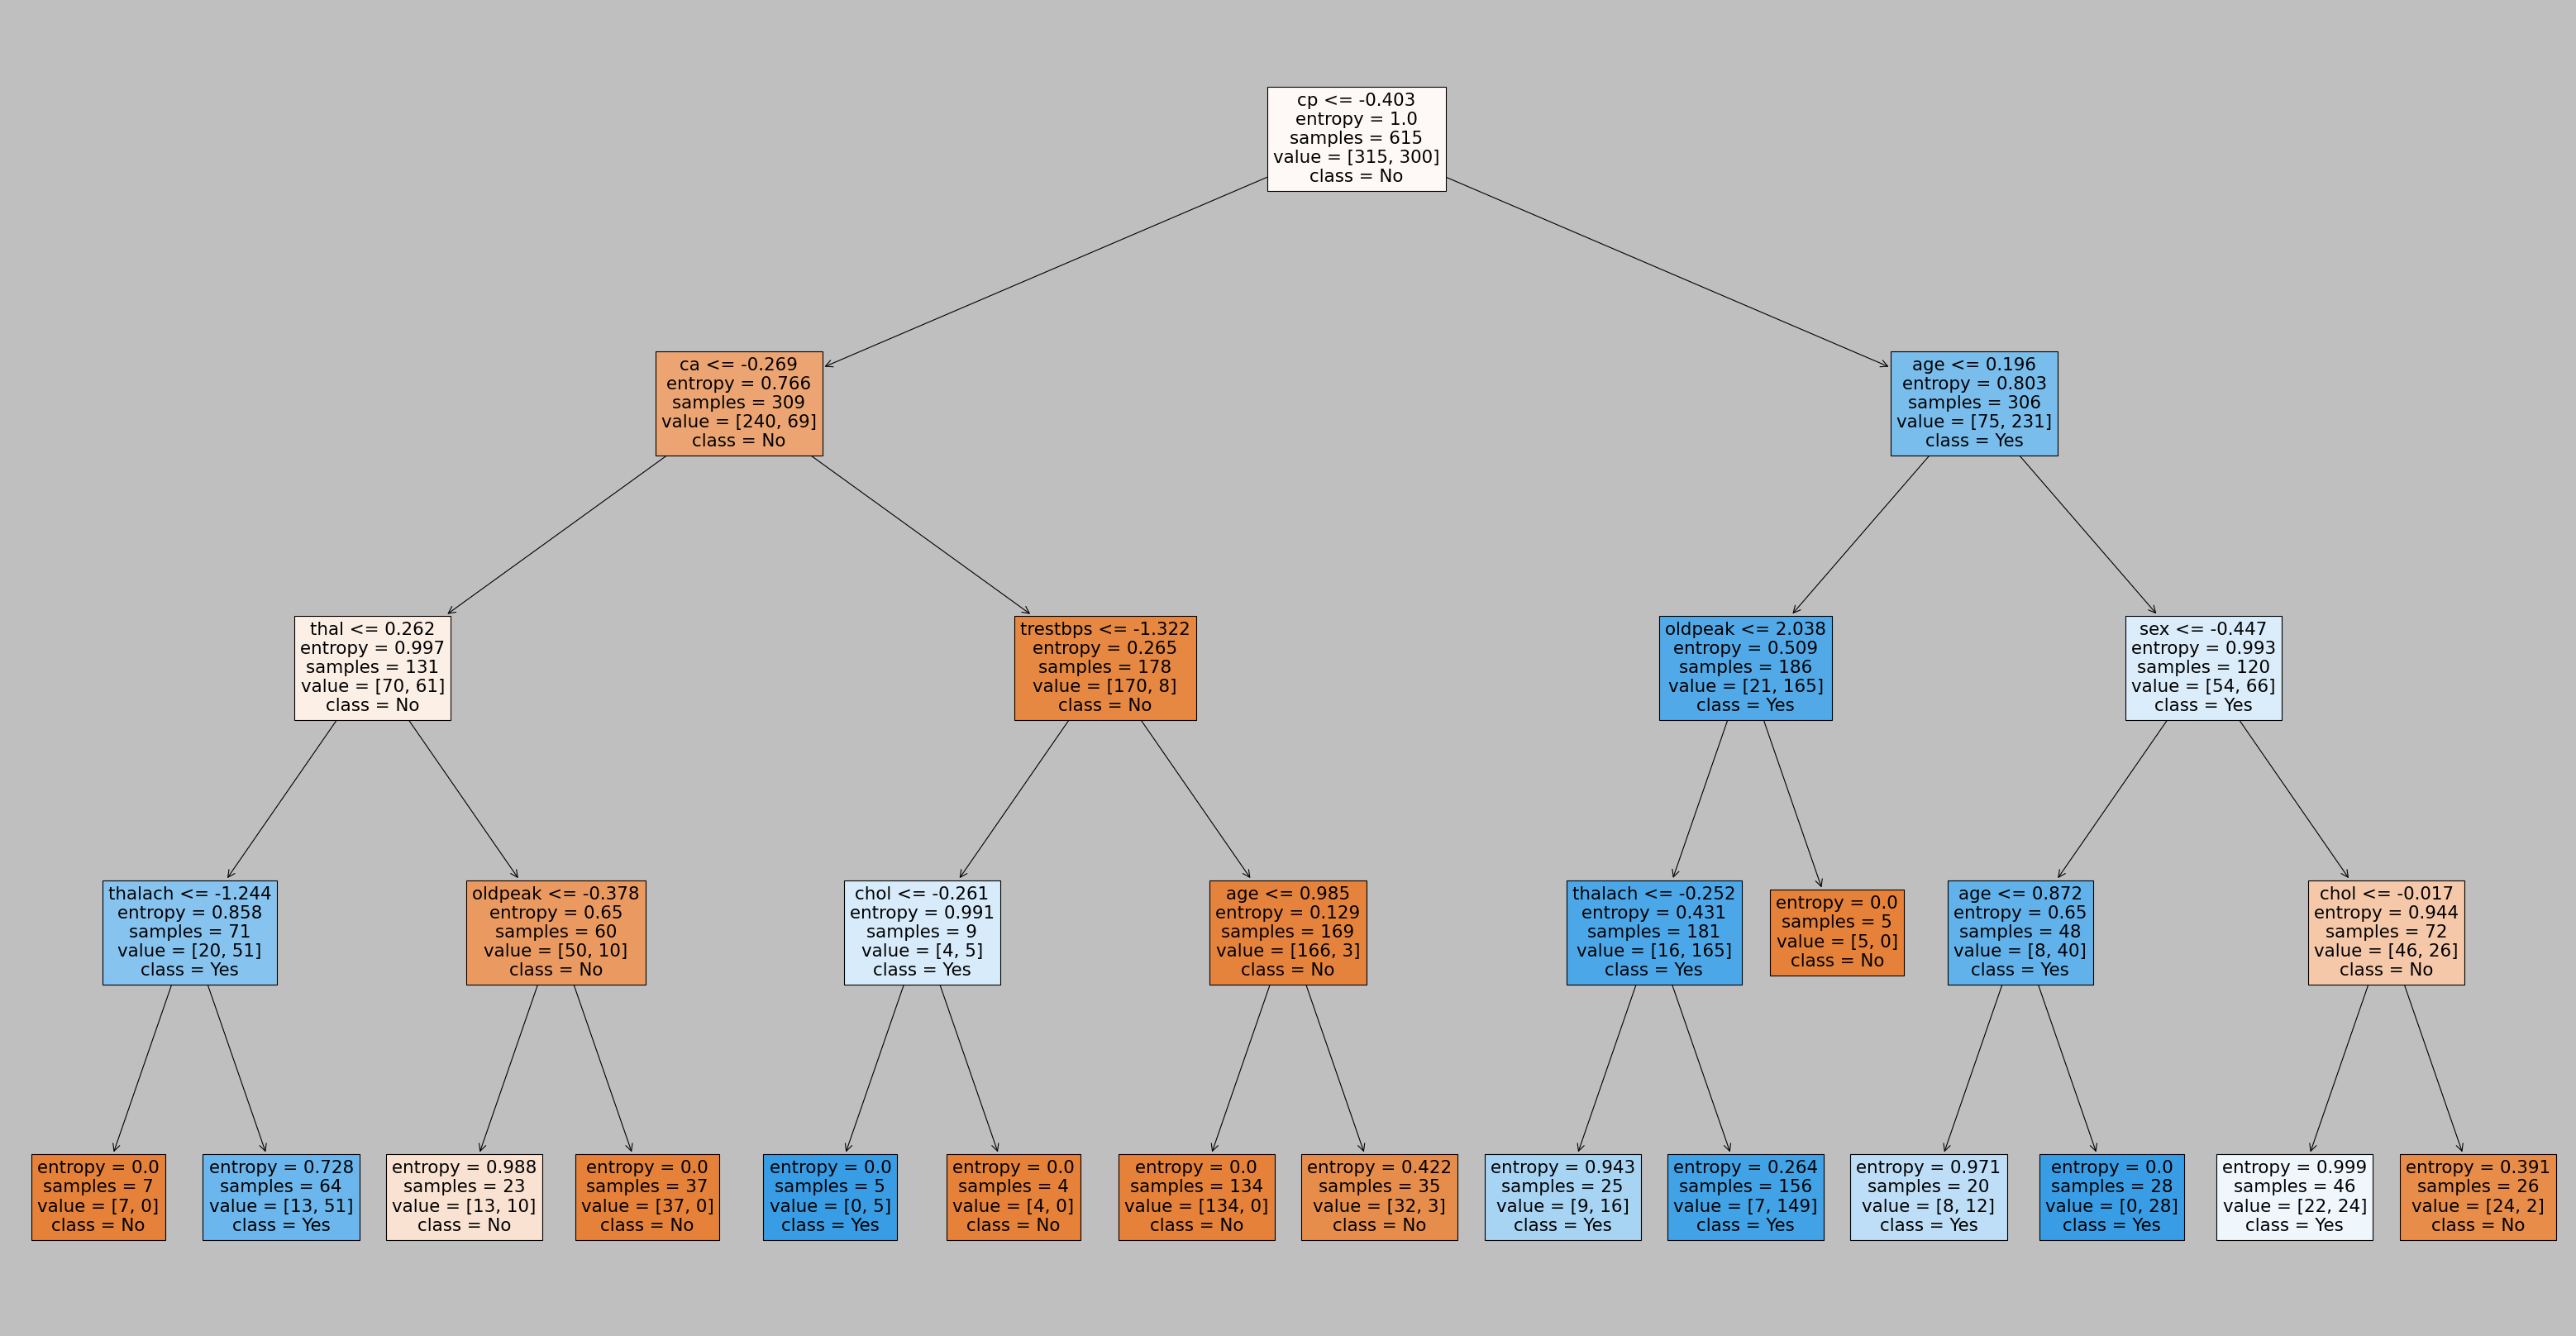

In [23]:
sns.set_style('whitegrid')
plt.style.use('classic')
import matplotlib
matplotlib.rcParams['text.color'] = 'black'

from sklearn.tree import plot_tree

fig =plt.figure(figsize=(50,25))
features = data.columns
classes = ['No','Yes']
plot_tree(dt,feature_names=features, class_names=classes, filled=True)
plt.show()
fig.savefig("dt4.pdf")

# Pruning 

### 1. prepruning depth

Prepruning sets constraint for growth of decision tree on an early stage. By limiting *max_depth* , *min_samples* etc., parameters, it is effective to grid search parameter space and choose the optimal parameters for selected datasets. 

We set max_depth, meaning maximum depth of decision tree, for parameter tuning.


In [24]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
               

Train score 0.9983739837398374
Test score 0.9658536585365853
Train Confusion matrix


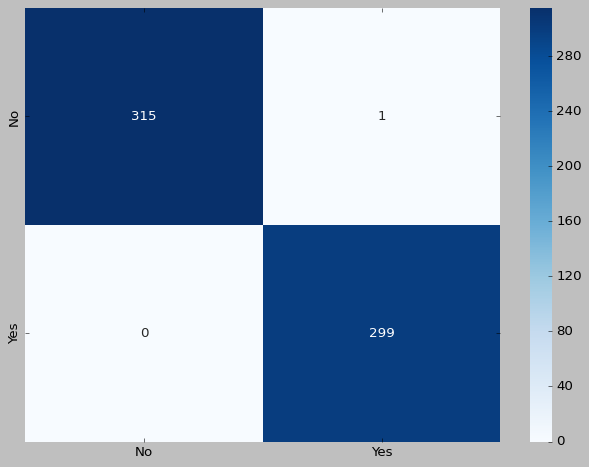

Test Confusion matrix


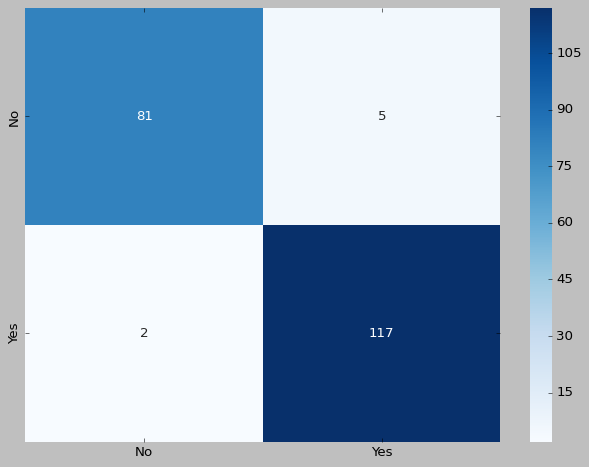

In [25]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    fig = plt.figure()
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()
    fig.savefig("confusionMatrix" + dom + ".pdf")
    
plot_confusionmatrix(y_train_pred, y_train, dom='Train')
plot_confusionmatrix(y_test_pred ,y_test, dom='Test')


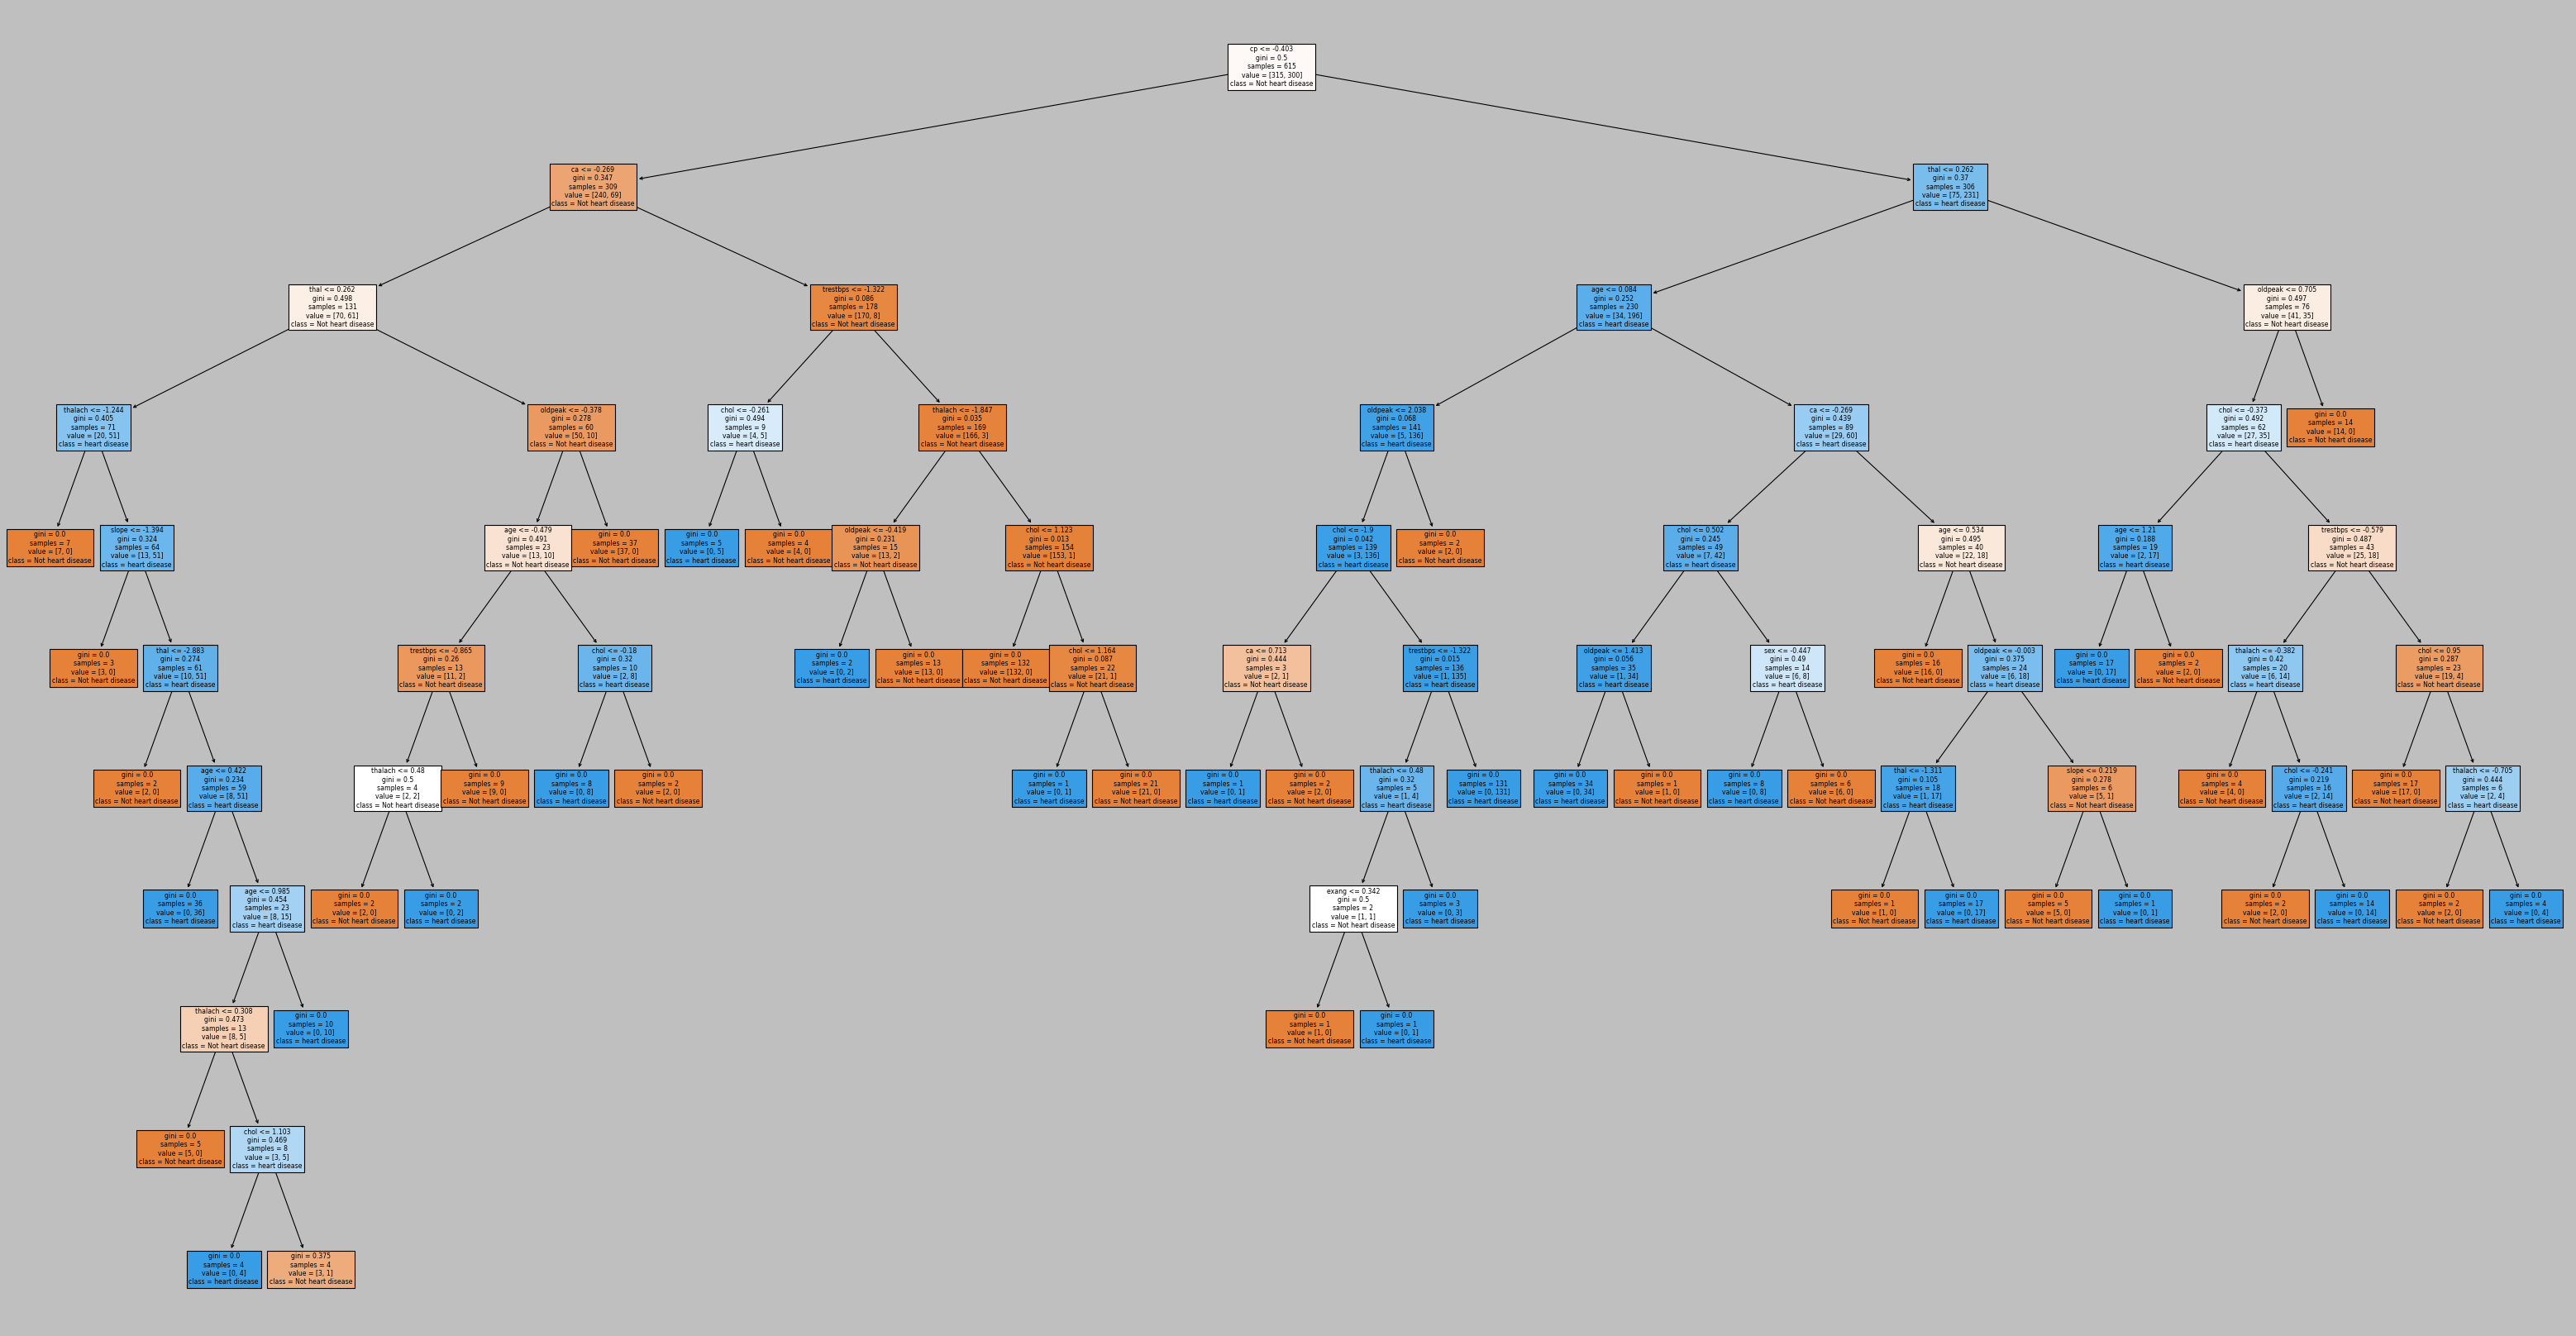

In [26]:
plt.figure(figsize=(50,25))
features = data.columns
classes = ['Not heart disease','heart disease']
plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

## 2. Post pruning

Cost complexity pruning is is an effect common postpruning technique to avoid the overfitting of decision trees. 
In the cose complexity pruning method, we will find the right parameter for **alpha**. 
We will get the alpha values and check the accuracy with the pruned trees.


In [27]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00107604 0.00161546 0.00216802 0.00243902 0.00271003
 0.00275172 0.00307136 0.00315912 0.003176   0.00365854 0.00390869
 0.00414939 0.00433604 0.00520325 0.00569106 0.00572762 0.00581943
 0.00613803 0.0064098  0.0064999  0.00722674 0.00767436 0.00796748
 0.00803734 0.00817654 0.00871922 0.00885276 0.00962852 0.00971494
 0.01183624 0.01303032 0.01471636 0.01496148 0.02849481 0.03218175
 0.04343533 0.14129644]


In [28]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

We will remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.


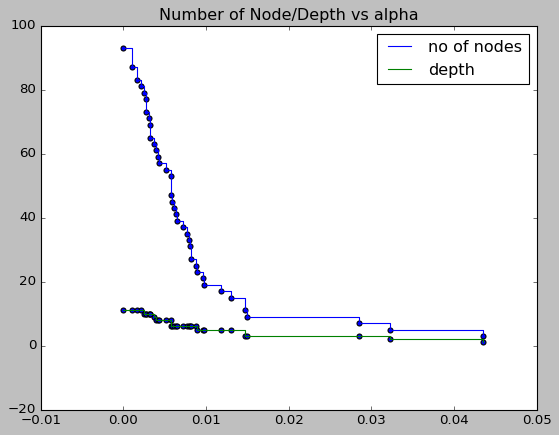

In [29]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.title('Number of Node/Depth vs alpha')
plt.legend()
plt.show()

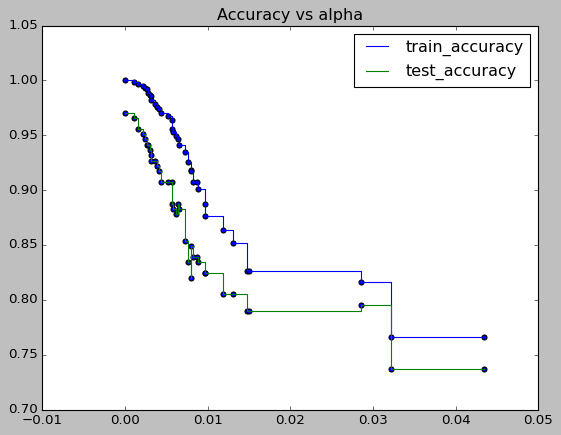

In [30]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

we can see that As alpha increases no of nodes and depth decreases. The best performance is obtained at smaller alpha value = 0.005. We can choose alpha = 0.005

Train score 0.9707317073170731
Test score 0.9073170731707317
Train Confusion matrix


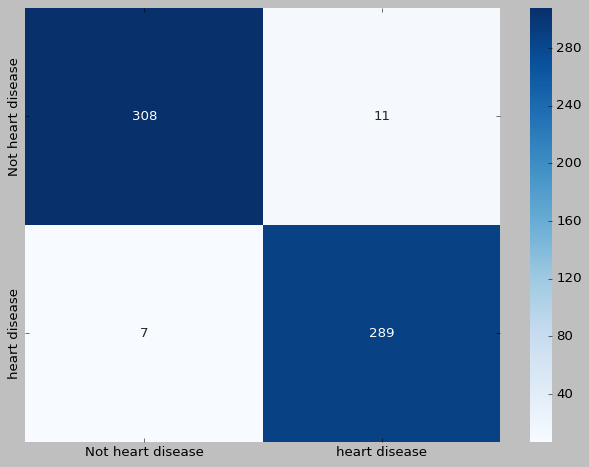

Test Confusion matrix


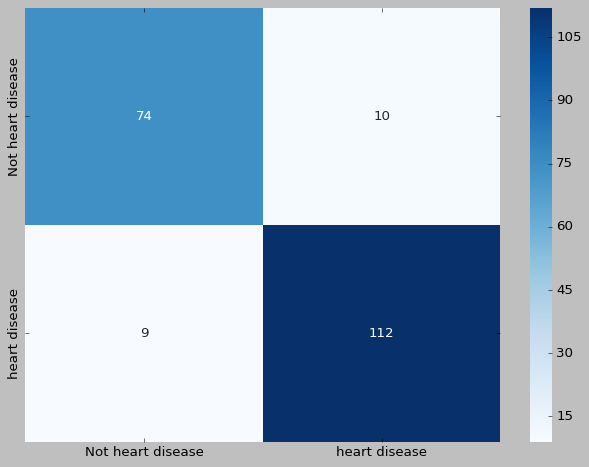

In [31]:

clf_ = DecisionTreeClassifier(random_state=0,ccp_alpha=0.005)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

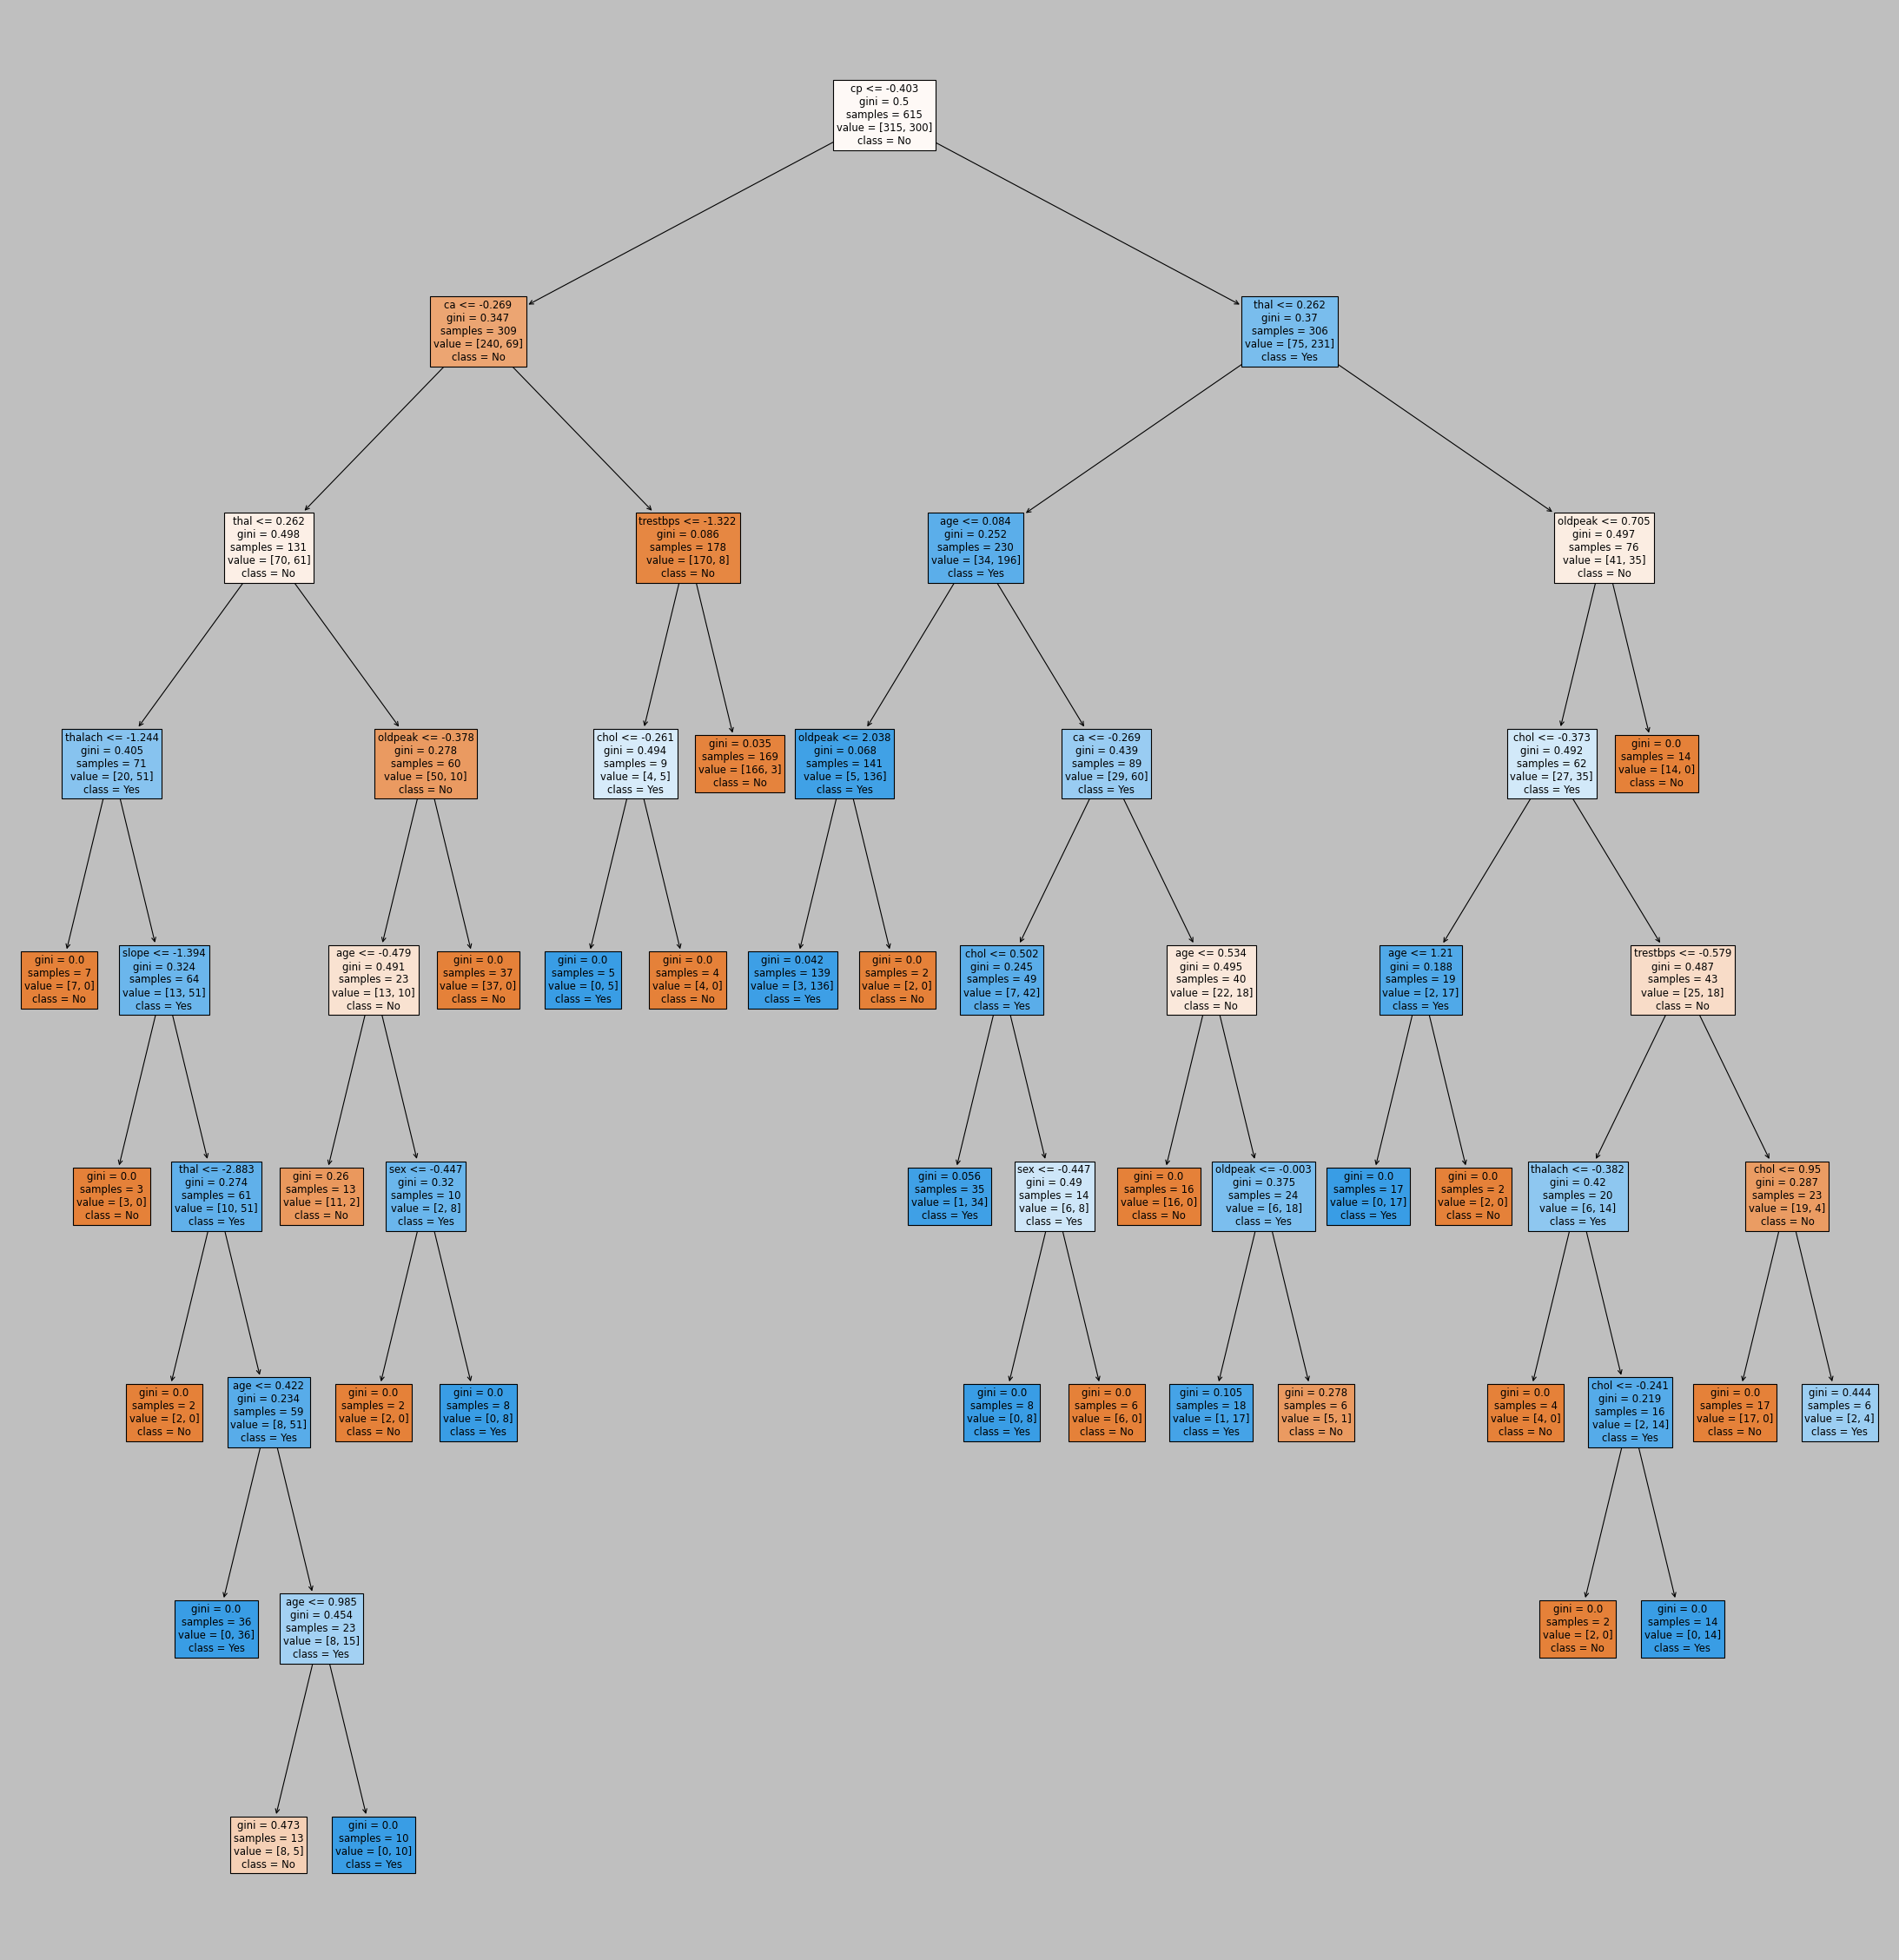

In [32]:
sns.set_style('whitegrid')
plt.style.use('classic')
import matplotlib
matplotlib.rcParams['text.color'] = 'black'

fig = plt.figure(figsize=(35,35))
features = data.columns
classes = ['No','Yes']
plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()
fig.savefig("dt_postprune.pdf")

We can see that the size of decision tree significantly got reduced than the original decision tree while maintaining the same accuracy.  And the decision tree is simplied than the original tree.


### Next we explore the relationship between auc and depth 


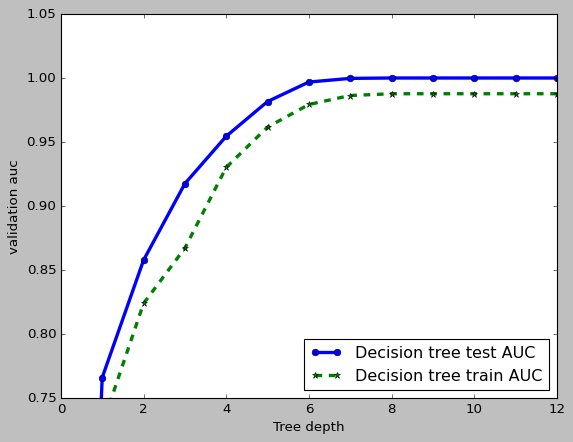

<Figure size 800x800 with 0 Axes>

In [33]:
fig = plt.figure()
plt.plot(tree_auc_test, '-o', linewidth=3, label = "Decision tree test AUC")
plt.plot(tree_auc_train, '--*', linewidth=3, label = "Decision tree train AUC")
plt.legend(loc = 'lower right')
plt.ylim(0.75, 1.05)
plt.xlabel("Tree depth")
plt.ylabel("validation auc")
plt.figure(figsize=(10,10))
plt.show()
fig.savefig("auc_depth.pdf")
#scores = cross_val_score(dt, X, y, cv=5)
#print('CV Accuracy: mean = %.3f (std deviation = %.3f)' % (mean(scores), std(scores))) 


Discussion: For this dataset, there is no clear optimal depth. As the tree is deeper than 6, the AUC is close to 1. But since the tree is easily overfitting, it would need additional pruning.


<!---
# Extreme Gradient Boost
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)

xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)

print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))
-->

# II Gradient Boosting Classifier

In addition to the decision tree with pruning, we also investigate the gradient boosting method to search for the optimal hyperparameters, including depth, learning rate.


CV Accuracy: mean = 0.991 (std deviation = 0.007)
CV Accuracy: mean = 0.997 (std deviation = 0.006)
CV Accuracy: mean = 1.000 (std deviation = 0.000)
CV Accuracy: mean = 0.947 (std deviation = 0.018)
CV Accuracy: mean = 0.995 (std deviation = 0.006)
CV Accuracy: mean = 1.000 (std deviation = 0.000)


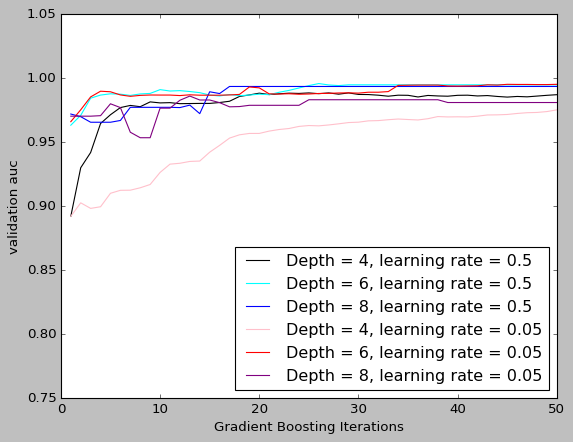

<Figure size 960x960 with 0 Axes>

In [34]:

from sklearn.ensemble import GradientBoostingClassifier as gbm
original_params = {'n_estimators': 50, 'random_state': 42}


fig = plt.figure()
for label, color, setting in [('Depth = 4, learning rate = 0.5', 'black', {'learning_rate': 0.5, 'max_depth': 4}),
                              ('Depth = 6, learning rate = 0.5', 'cyan',  {'learning_rate': 0.5, 'max_depth': 6}),
                              ('Depth = 8, learning rate = 0.5', 'blue',  {'learning_rate': 0.5, 'max_depth': 8}),
                              ('Depth = 4, learning rate = 0.05', 'pink', {'learning_rate': 0.05, 'max_depth': 4}),
                              ('Depth = 6, learning rate = 0.05', 'red',    {'learning_rate': 0.05, 'max_depth': 6}),
                              ('Depth = 8, learning rate = 0.05', 'purple', {'learning_rate': 0.05, 'max_depth': 8})]:
    params = dict(original_params)
    params.update(setting)
    gbc = gbm(**params)
    gbc.fit(X_train, y_train)

    # compute test set auc
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)
    
    scores = cross_val_score(gbc, X, y, cv=5)
    print('CV Accuracy: mean = %.3f (std deviation = %.3f)' % (mean(scores), std(scores))) 

    for i, y_pred in enumerate(gbc.staged_predict_proba(X_test)):
        test_deviance[i] = roc_auc_score(y_test, y_pred[:,1])
    
    #print test auc
    plt.plot((np.arange(test_deviance.shape[0]) + 1), test_deviance,
            '-', color=color, label=label)

plt.legend(loc='lower right')
plt.ylim(0.75, 1.05)
plt.xlabel('Gradient Boosting Iterations')
plt.ylabel("validation auc")
plt.figure(figsize=(12,12))
plt.show()
fig.savefig("auc_gbp.pdf")

In [35]:


params = dict(original_params)
setting  = {'learning_rate': 0.5, 'max_depth': 6}
params.update(setting)
gbc = gbm(**params)
gbc.fit(X_train, y_train)
gbc_predicted = gbc.predict(X_test)
gbc_acc_score = accuracy_score(y_test, gbc_predicted)
scores = cross_val_score(gbc, X, y, cv=5)
print('CV Accuracy: mean = %.3f (std deviation = %.3f)' % (mean(scores), std(scores))) 



CV Accuracy: mean = 0.997 (std deviation = 0.006)


It is clear that with a lower depth = 6, the gradient boosting method achieves a higher accuracy

# III k-Nearest Neighbors
As opposed to decision tree models, KNN is a an instance based learning, instead of fitting a learned function, to classify the train and testing instances. 

For this reason, kNN training is fast by cleaning and storing the data, However, testing using kNN is comparatively slower since, it will search the feature space in the traing data to identify the 'nearest' neighbors, thus much more time-consuming. For our heart disease data, we have training data of hundreds of rows, thus k should be chosen accordingly.

kNN is an non-parametric method, only consists of the k closest training examples in the feature space. 
We shall use the scikit learning library again to make predictions based on KNN. 
Below we test to measure the training and test errors when the value of k increases. 

A very important consideration in using distance metrics is scaling our input.  In a tree-based model, the scale of the variable is not important, but for KNN, when measuring the nearest neighbore, the variable should be scaled equally, unless we have a specific reason to weight the variable higher, otherwise it has a large variance The variable will dwarf the variable with the lower variance.


In [36]:
# Let's begin with an single example of k = 5 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)

print("kNN confussion matrix: ")
print(knn_conf_matrix)
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

kNN confussion matrix: 
[[ 69  14]
 [ 14 108]]
Accuracy of K-NeighborsClassifier: 86.34146341463415 

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        83
           1       0.89      0.89      0.89       122

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



In [37]:
kn = range(5,51,5)
kauc_train, kauc_test = np.zeros(len(kn)), np.zeros(len(kn))
for i, k in zip(range(0, len(kn)), kn):
    clf1 = KNeighborsClassifier(n_neighbors=k, algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, p=2, weights='uniform')
    clf1 = clf1.fit(X_train, y_train)
    pred_test = clf1.predict_proba(X_test)[:,1]
    pred_train = clf1.predict_proba(X_train)[:,1]
    kauc_test[i] = roc_auc_score(y_test, pred_test)
    kauc_train[i] = roc_auc_score(y_train, pred_train)

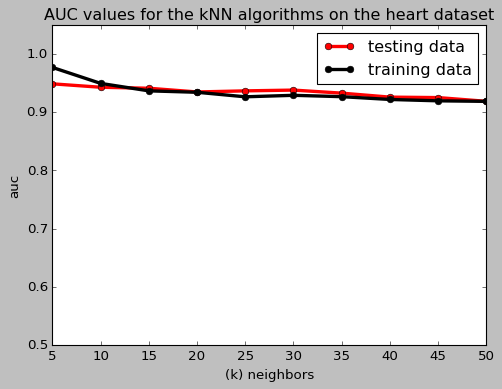

In [38]:
fig = plt.figure(figsize=(7,5))
plt.title("AUC values for the kNN algorithms on the heart dataset")
plt.plot(kn, kauc_test, 'o-', color = 'red', linewidth=3, label = "testing data")
plt.plot(kn, kauc_train, 'o-', color = 'black', linewidth=3, label = "training data")
plt.legend()
plt.ylim(0.5, 1.05)
plt.xlabel("(k) neighbors")
plt.ylabel( "auc" )
plt.show()
fig.savefig("auc_neighbors.pdf")

In [39]:
print ("Best test set auc is %0.3f" % kauc_test.max(), "for %0.0f neighbors" % list(range(5,71,5))[kauc_test.argmax()])

Best test set auc is 0.949 for 5 neighbors


# IV Support Vector Classifier



In [40]:
# Now we prep the data for a svm

costs = np.power(10.0, range(-2,2))
kernels = ['linear', 'rbf']
auc_rad_tst = np.zeros((len(costs),len(kernels)))
auc_rad_trn = np.zeros((len(costs),len(kernels)))

# Comment out second layer for run time.
for i in range(len(costs)):
    for k in range(len(kernels)):
        print ('cost', i, costs[i], k, kernels[k])
        svc = SVC(kernel = kernels[k], C=costs[i], probability=True)
        svc.fit(X_train,y_train)
        auc_rad_tst[i,k] = roc_auc_score(y_test, svc.predict_proba(X_test)[:,1])
        auc_rad_trn[i,k] = roc_auc_score(y_train, svc.predict_proba(X_train)[:,1])

cost 0 0.01 0 linear
cost 0 0.01 1 rbf
cost 1 0.1 0 linear
cost 1 0.1 1 rbf
cost 2 1.0 0 linear
cost 2 1.0 1 rbf
cost 3 10.0 0 linear
cost 3 10.0 1 rbf


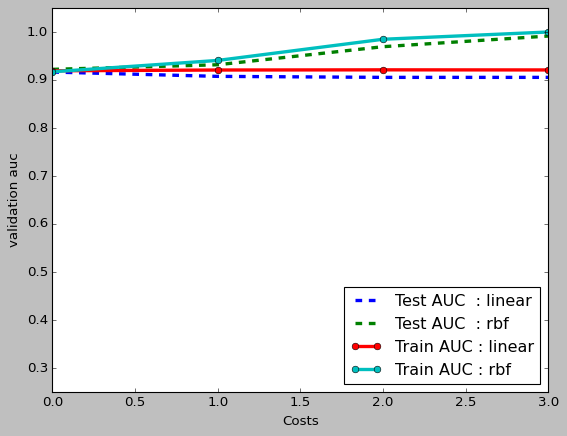

In [41]:
fig = plt.figure()

for k in range(len(kernels)):
    plt.plot(auc_rad_tst[:,k], '--',  linewidth=3, label="Test AUC  : "+kernels[k])
for k in range(len(kernels)):
    plt.plot(auc_rad_trn[:,k], '-o', linewidth=3, label="Train AUC : "+kernels[k])

plt.legend(loc='lower right')
plt.ylim(0.25, 1.05)
np.set_printoptions(precision=3)
#plt.xticks(range(len(costs)),['0.001', '0.01','0.1', '1','10', '100','1000'])
plt.xlabel("Costs")
plt.ylabel("validation auc")
plt.show()
fig.savefig("auc_svm.pdf")

In [42]:
# One single example

svc =  SVC(kernel='linear')
svc.fit(X_train, y_train)

svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)

print("confustion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:", svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))


confustion matrix
[[ 63  20]
 [ 11 111]]


Accuracy of Support Vector Classifier: 84.8780487804878 

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        83
           1       0.85      0.91      0.88       122

    accuracy                           0.85       205
   macro avg       0.85      0.83      0.84       205
weighted avg       0.85      0.85      0.85       205



# Artificial Neural Networks


In [43]:
import tensorflow as tf
from tensorflow import keras

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle= True)
print("The shape of X_train is      ",X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)
print("The shape of Y_valid is      ", y_valid.shape)
print("The shape of X_valid is       ",X_valid.shape)

The shape of X_train is       (820, 13)
The shape of X_test is        (205, 13)
The shape of y_train is       (820,)
The shape of y_test is        (205,)
The shape of Y_valid is       (205,)
The shape of X_valid is        (205, 13)


In [45]:
#logs for tensorboard 
import os

root_logdir = os.path.join(os.curdir, "my_logs")
print(os.path)
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir,run_id)

run_logdir = get_run_logdir()
print(run_logdir)

<module 'posixpath' from '/Users/ruogu.fang/anaconda3/lib/python3.7/posixpath.py'>
./my_logs/run_2021_09_26-23_40_34


In [46]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(100, input_shape = (200,13), activation = "relu"))#hidden layer with 300 neurons with relu activation15
model.add(keras.layers.Dense(50, activation = "relu")) #hidden layer with 100 neurons with relu activation
model.add(keras.layers.Dense(1, activation = "sigmoid"))
model.summary()

#optimizer Adam with particular hyperparameter 
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001)

#compiling model
model.compile(optimizer=optimizer,
             loss = "binary_crossentropy",
             metrics= ["accuracy"])

early_stopping_nn = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_nn = keras.callbacks.TensorBoard( log_dir = run_logdir, histogram_freq=1)
heart_model = model.fit(X_train, y_train, epochs= 100, validation_data = (X_valid,  y_valid), callbacks= [early_stopping_nn, tensorboard_nn])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200, 100)          1400      
_________________________________________________________________
dense_1 (Dense)              (None, 200, 50)           5050      
_________________________________________________________________
dense_2 (Dense)              (None, 200, 1)            51        
Total params: 6,501
Trainable params: 6,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
26/26 [==============================] - 1s 31ms/step - loss: 1.1116 - accuracy: 0.5902 - val_loss: 0.5872 - val_accuracy: 0.7171
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.6488 - val_loss: 0.7185 - val_accuracy: 0.6244
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6334 - accuracy: 0.6829 - 

In [47]:
# try a differnt model
model = keras.models.Sequential()
model.add(keras.layers.Dense(52,activation='relu',input_dim=13))
model.add(keras.layers.Dense(26,activation='relu',input_dim=13))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train, epochs=100)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 52)                728       
_________________________________________________________________
dense_4 (Dense)              (None, 26)                1378      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 27        
Total params: 2,133
Trainable params: 2,133
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
26/26 [==============================] - 0s 1ms/step - loss: 8.8376 - accuracy: 0.5171
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 1.3857 - accuracy: 0.5817
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6657 - accuracy: 0.6463
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.5994 - acc

<Figure size 640x480 with 0 Axes>

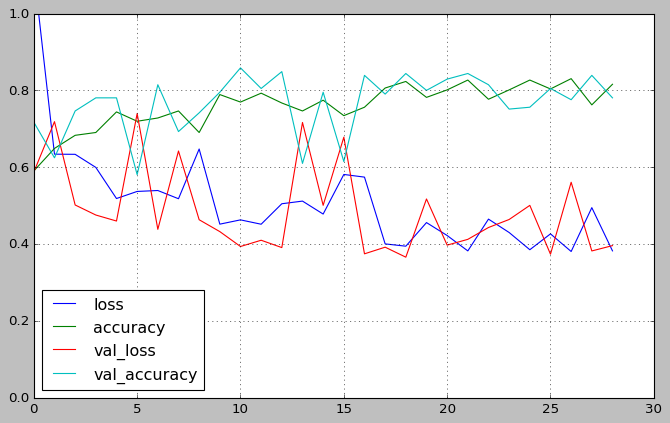

In [48]:
#plot graphs from model history
fig = plt.figure()
pd.DataFrame(heart_model.history).plot (figsize = (10,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
fig.savefig("ann_log.pdf")

In [49]:

model.evaluate(X_test, y_test)
#comparing results with predictions
y_predictions = model.predict(X_test).reshape(-1)
print (y_predictions[:5])

ann_predicted = np.round(y_predictions)
ann_acc_score = accuracy_score(y_test, ann_predicted)


from sklearn.metrics import confusion_matrix, classification_report
print ( classification_report(ann_predicted, y_test))


7/7 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 0.8098
[0.98  0.988 0.051 0.98  0.061]
              precision    recall  f1-score   support

         0.0       0.69      0.91      0.78        77
         1.0       0.93      0.75      0.83       128

    accuracy                           0.81       205
   macro avg       0.81      0.83      0.81       205
weighted avg       0.84      0.81      0.81       205



# Accuracy Metrics


In [50]:

knn_FPR,knn_TPR,knn_threshold  = roc_curve(y_test, knn_predicted)
dt_FPR,dt_TPR,dt_threshold     = roc_curve(y_test, dt_predicted)
svc_FPR,svc_TPR,svc_threshold  = roc_curve(y_test, svc_predicted)
ann_FPR,ann_TPR, ann_threshold =  roc_curve(y_test, ann_predicted)
gbc_FPR,gbc_TPR, gbc_threshold =  roc_curve(y_test, gbc_predicted)


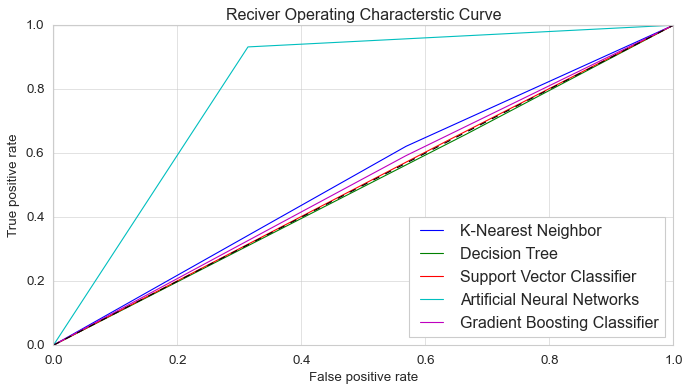

In [51]:

sns.set_style('whitegrid')
fig = plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
#plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
#plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
#plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
#plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_FPR,knn_TPR,label='K-Nearest Neighbor')
plt.plot(dt_FPR,dt_TPR,  label='Decision Tree')
plt.plot(svc_FPR,svc_TPR,label='Support Vector Classifier')
plt.plot(ann_FPR,ann_TPR,label='Artificial Neural Networks')
plt.plot(gbc_FPR,gbc_TPR,label='Gradient Boosting Classifier')

plt.plot([0,1],'black',ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend(loc = 'lower right')
plt.show()
fig.savefig("auc.pdf")

**Conclusion**

1) Gradient Boost Classifier gives the best accuracy compared to other models.

2) Exercise induced angina,Chest pain is major symptoms of heart attack.

3) Ensembling technique increase the accuracy of the model.

1. Out of the 13 features we examined, the top 4 significant features that helped us classify between a positive & negative Diagnosis were chest pain type (cp), maximum heart rate achieved (thalach), number of major vessels (ca), and ST depression induced by exercise relative to rest (oldpeak).

2. Our machine learning algorithm can now classify patients with Heart Disease. Now we can properly diagnose patients, & get them the help they needs to recover. By diagnosing detecting these features early, we may prevent worse symptoms from arising later.

3. Our Random Forest algorithm yields the highest accuracy, 80%. Any accuracy above 70% is considered good, but be careful because if your accuracy is extremely high, it may be too good to be true (an example of Over fitting). Thus, 80% is the ideal accuracy!



# Model Evaluation

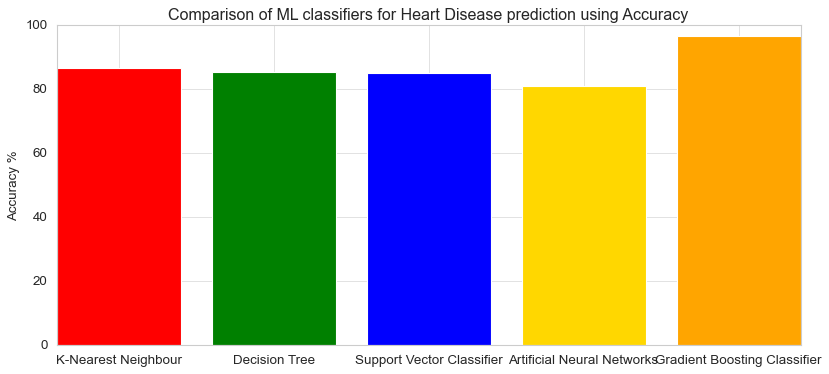

In [53]:

model_ev = pd.DataFrame({'Model': [
                        'K-Nearest Neighbour','Decision Tree','Support Vector Classifier', 'Artificial Neural Networks', 'Gradient Boosting Classifier'], 
                        'Accuracy': [
                            knn_acc_score*100,dt_acc_score*100,svc_acc_score*100,ann_acc_score*100,gbc_acc_score*100]
                        })



colors = ['red','green','blue','gold','orange',]


fig = plt.figure(figsize=(12,5))
plt.title("Comparison of ML classifiers for Heart Disease prediction using Accuracy")
plt.ylabel("Accuracy %")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)

plt.show()
fig.savefig("comare.pdf")

# Prediction
A patient develops cardiac symptoms & you input his vitals into the Machine Learning Algorithm.
He is a 20 year old male, with a chest pain value of 2 (atypical angina), with resting blood pressure of 110.
In addition he has a serum cholestoral of 230 mg/dl.
He is fasting blood sugar > 120 mg/dl.
He has a resting electrocardiographic result of 1.
The patients maximum heart rate achieved is 140.
Also, he was exercise induced angina.
His ST depression induced by exercise relative to rest value was 2.2.
The slope of the peak exercise ST segment is flat.
He has no major vessels colored by fluoroscopy, and in addition his maximum heart rate achieved is a reversible defect.
Based on this information, can you classify this patient with Heart Disease?
